In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
client_df = pd.read_csv("/content/client_data (1).csv")
price_df = pd.read_csv("/content/price_data (1).csv")
print(client_df.head)
print(price_df.head)

<bound method NDFrame.head of                                      id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_mont

In [13]:
# Shape of datasets
print("client Data Shape:", client_df.shape)
print("Price Data Shape:", price_df.shape)

client Data Shape: (14606, 26)
Price Data Shape: (193002, 8)


In [16]:
# Data types
client_df.info()
price_df.info()

# Missing values
print(client_df.isnull().sum())
print(price_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [18]:
# Summary stats for numerical columns
client_df.describe().T
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


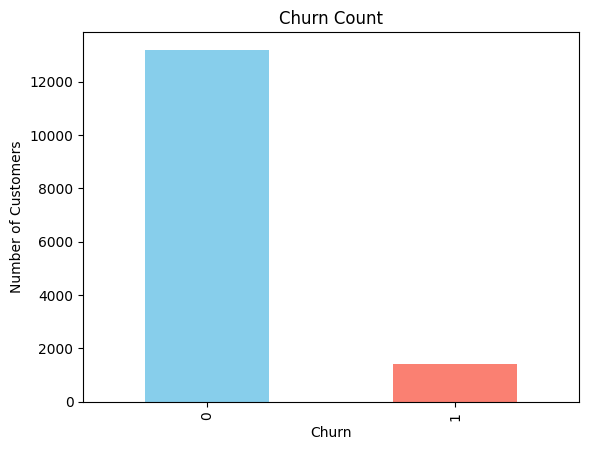

Churn Rate:
churn
0    0.902848
1    0.097152
Name: proportion, dtype: float64


In [20]:
# Value counts
client_df['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Churn Count")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

# Churn rate
print("Churn Rate:")
print(client_df['churn'].value_counts(normalize=True))

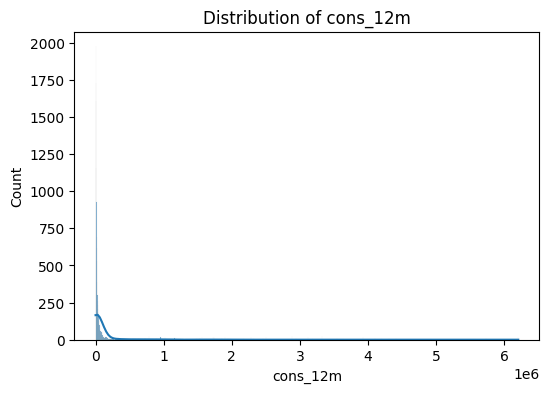

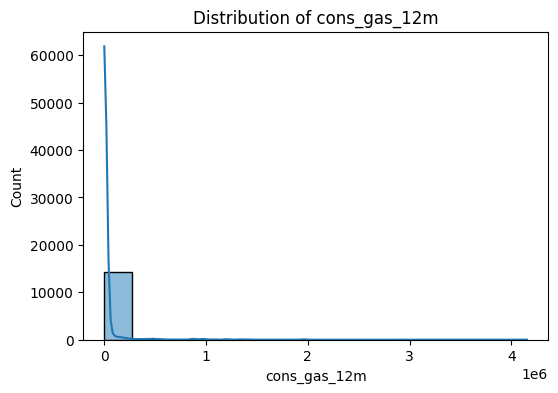

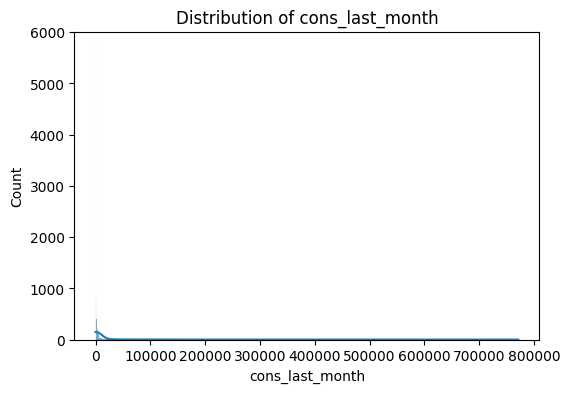

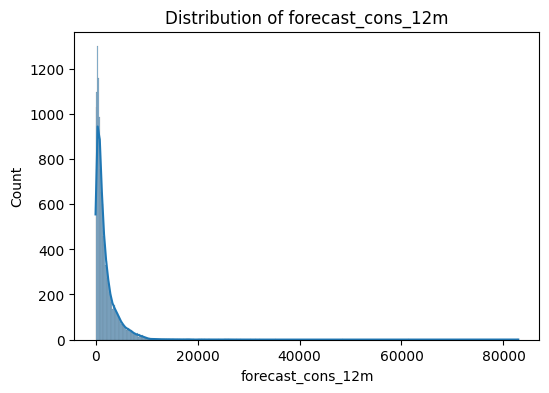

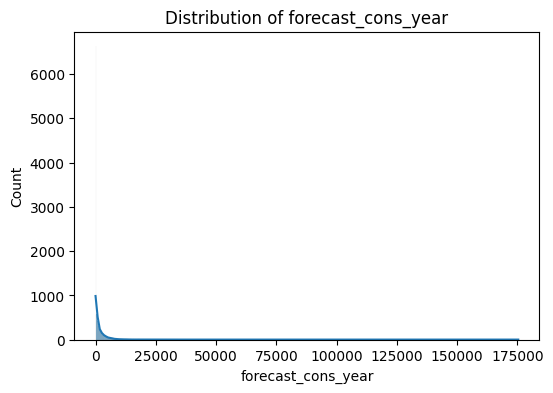

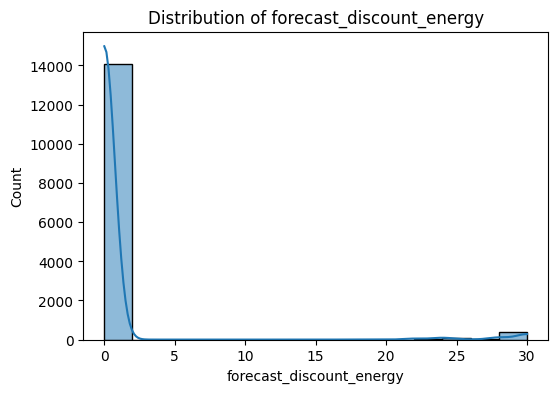

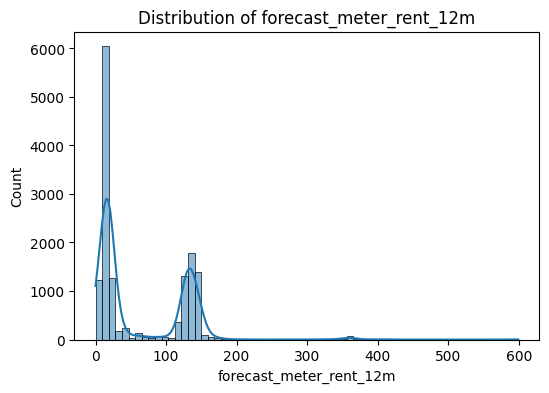

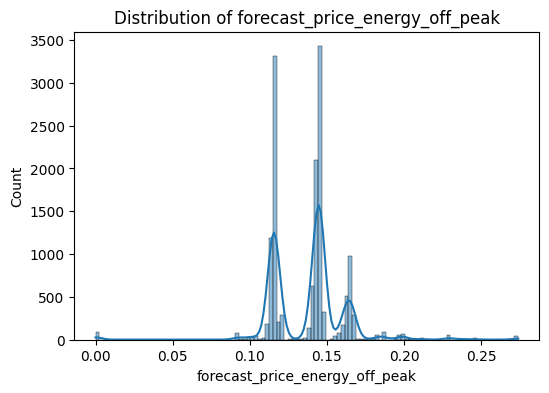

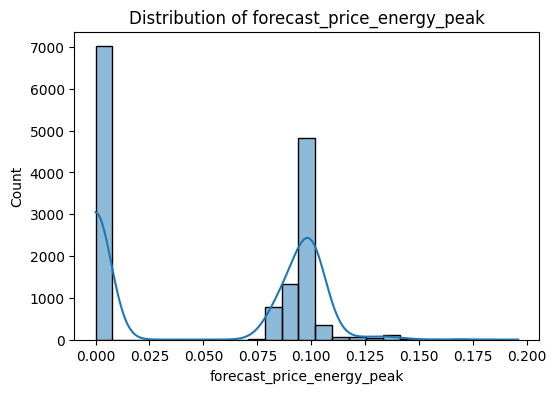

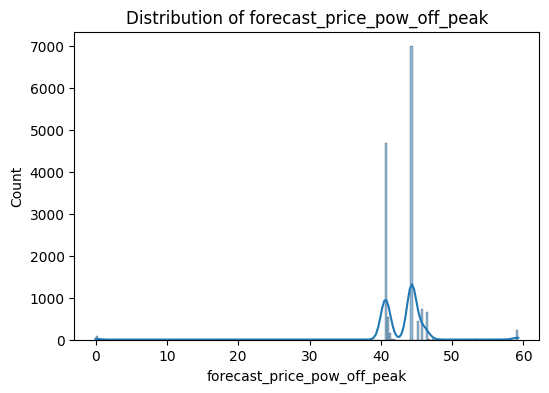

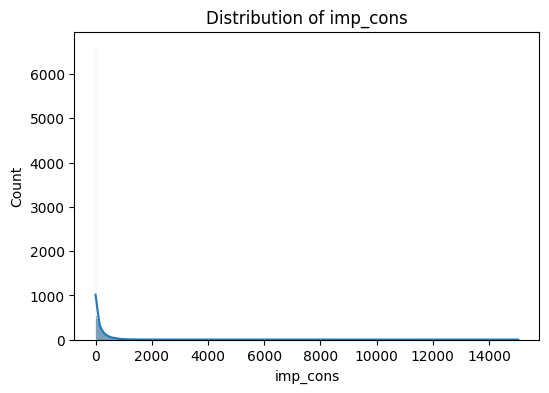

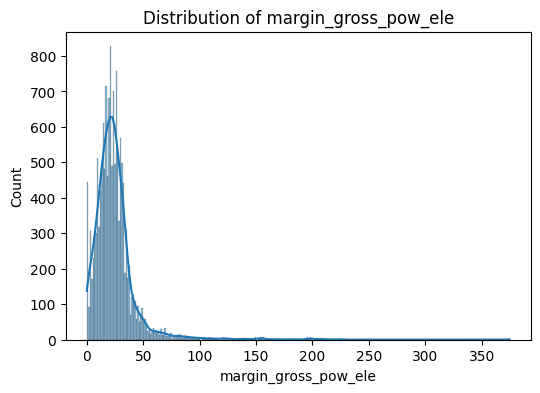

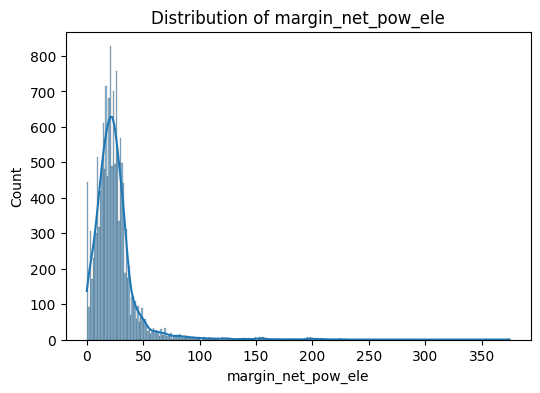

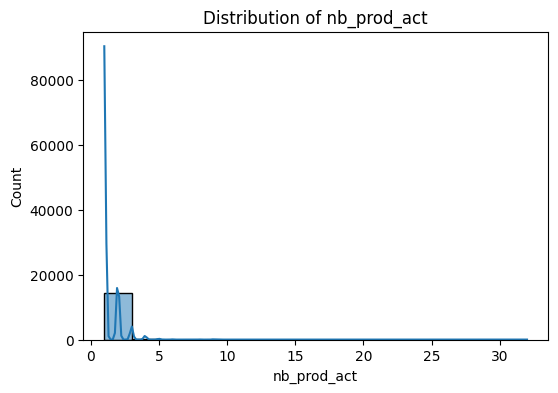

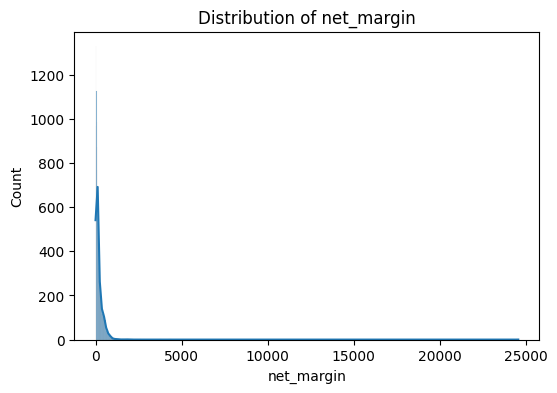

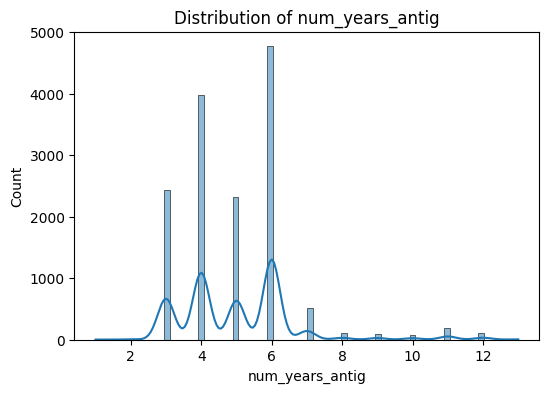

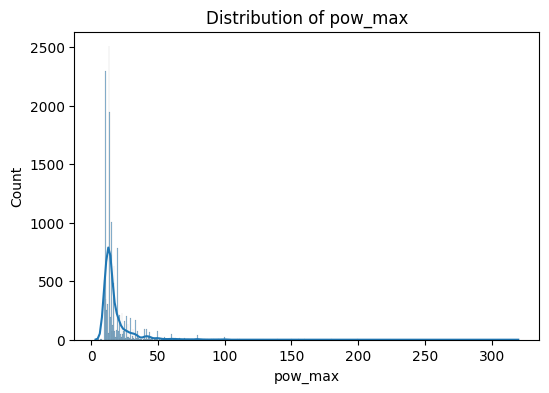

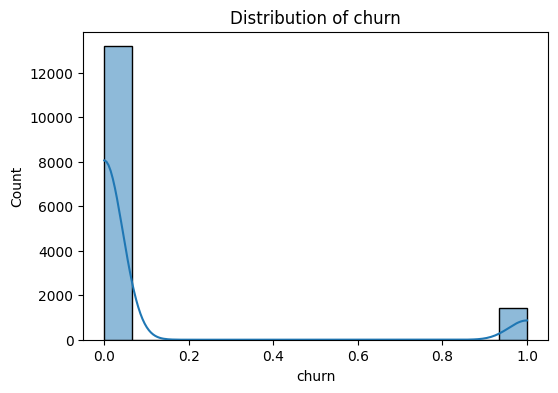

In [22]:
# Numeric columns in client data
num_cols = client_df.select_dtypes(include=np.number).columns.tolist()

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(client_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()